# Frozen Lake using Tabular Reinforcement Learning (Q-learning)

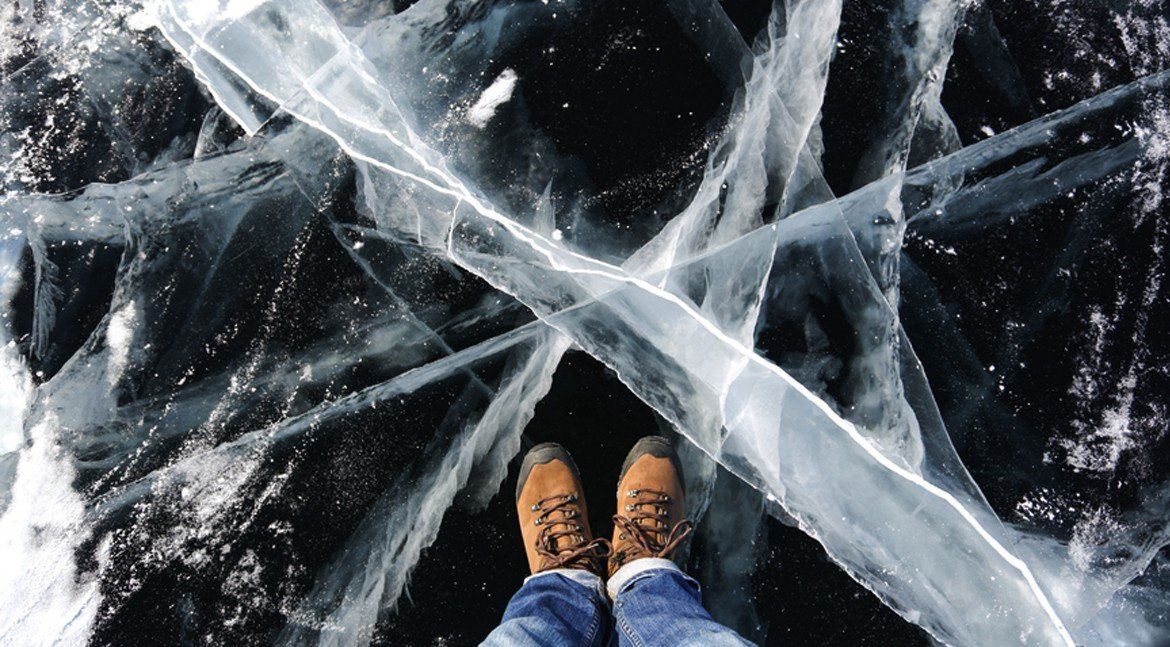

In [ ]:
import numpy as np
import gym

## Hyperparameters

In [ ]:
# Parâmetros de exploração
epsilon = 0.95
min_epsilon = 0.1
decay_rate = 0.2

# Número de episodios e passos
total_episodes = 50000
max_steps = 100

# Passo de aprendizagem
learning_rate = 0.05

# Parâmetro de desconto
gamma = 0.96

env = gym.make('FrozenLake-v0', is_slippery=False)
env.render()
Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q.shape)


SFFF
FHFH
FFFH
HFFG
(16, 4)


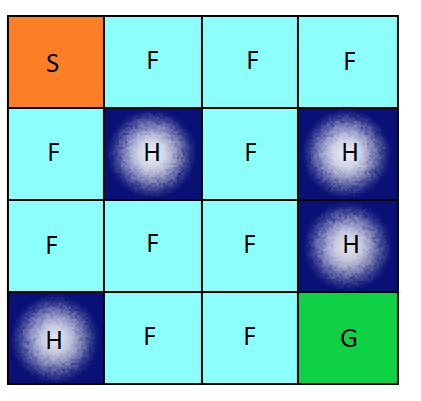

## Action function

In [ ]:
# Obtém a ação, que pode ser aleatória ou a que retorna o maior Q-value

def choose_action(observation, eval=False):
  action = 0
  if np.random.uniform(0, 1) < epsilon and not eval:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q[observation, :])
  return action

## Learn function (Q-learning)

image.png

In [ ]:
def learn(observation, observation2, reward, action):
  prediction = Q[observation, action]
  target = reward + gamma * np.max(Q[observation2, :])
  Q[observation, action] = Q[observation, action] + learning_rate * (target - prediction)

## Training process

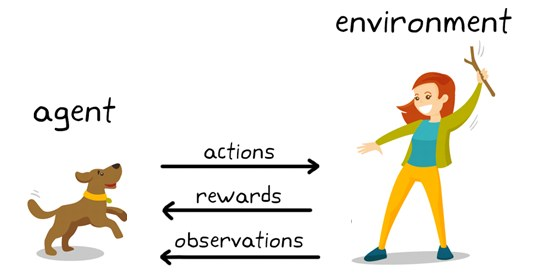

In [ ]:
for episode in range(total_episodes):
  obs = env.reset()
  t = 0
  if episode % 100 == 99:
    epsilon *= decay_rate
    epsilon = max(epsilon, min_epsilon)  
  while t < max_steps:
    action = choose_action(obs)
    obs2, reward, done, info = env.step(action)
    learn(obs, obs2, reward, action)
    obs = obs2
    t += 1    
    if done:
      if reward > 0.0:
        print("Win")
      else:
        print("Lose")
      break

Streaming output truncated to the last 5000 lines.
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Lose
Win
Win
Lose
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Lose
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Lose
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lose
Win
Win
Win
Win
Win
Win
Win
Win
Win
Lo

## Agent evaluation

In [ ]:
import time
env.reset()
env.render()
done = False
while not done:
  time.sleep(1)
  action = choose_action(obs, eval=True)
  obs2, reward, done, info = env.step(action)
  obs = obs2
  env.render()
  if done:
      if reward > 0.0:
        print("Win")
      else:
        print("Lose")
      break


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Win


# SARSA algorithm

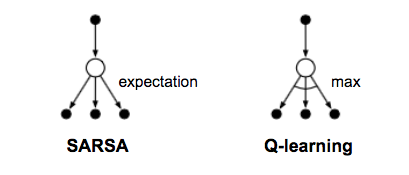

In [ ]:
# Parâmetros de exploração
epsilon = 0.9

# Número de episodios e passos
total_episodes = 10000
max_steps = 100

# Passo de apendizagem
alpha = 0.85

# Parâmetro de desconto
gamma = 0.95
 
# Inicia a Q-table
Q = np.zeros((env.observation_space.n, env.action_space.n))


## Atualizando a Q-table com o método SARSA

image.png

In [ ]:
def update(state, state2, reward, action, action2):
	predict = Q[state, action]
	target = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + alpha * (target - predict)

In [ ]:
reward=0

for episode in range(total_episodes):
	t = 0
	state1 = env.reset()
	action1 = choose_action(state1)

	while t < max_steps:
		env.render()
		
		state2, reward, done, info = env.step(action1)

		action2 = choose_action(state2)
		
		update(state1, state2, reward, action1, action2)

		state1 = state2
		action1 = action2
		
		t += 1
		reward += 1
		
		if done:
			break


Streaming output truncated to the last 5000 lines.
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
H

# Diferença entre os métodos

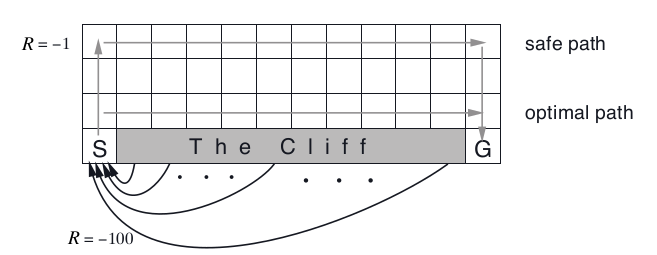

A palavra da grade é de tamanho 4x12, onde o penhasco está na última linha de tamanho 10 entre o estado inicial e final. Cada passo que leva o agente a cair dentro do penhasco receberá -100 de recompensa, caso contrário -1.

Vamos tomar ϵ = 0,1
em nossos experimentos. A cada passo, o agente tem 10% de não seguir a ação gananciosa (ou a ação com maior valor Q).